<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/multi_modal_pydantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal GPT4V Pydantic Program

In this notebook, we show you how to generate `structured data` with new OpenAI GPT4V API via LlamaIndex. The user just needs to specify a Pydantic object.

We also compared several Large Vision models for this task:
* GPT4-V
* Fuyu-8B
* MiniGPT-4
* CogVLM
* Llava-14B

## Download Image Locally

In [ ]:
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-multi-modal-llms-replicate

In [ ]:
import os

OPENAI_API_KEY = "sk-<your-openai-api-token>"
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
REPLICATE_API_TOKEN = ""  # Your Relicate API token here
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [ ]:
from pathlib import Path

input_image_path = Path("restaurant_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1GlqcNJhGGbwLKjJK1QJ_nyswCTQ2K2Fq" -O ./restaurant_images/fried_chicken.png

## Initialize Pydantic Class for Restaurant

In [ ]:
from pydantic import BaseModel


class Restaurant(BaseModel):
    """Data model for an restaurant."""

    restaurant: str
    food: str
    discount: str
    price: str
    rating: str
    review: str

## Load OpenAI GPT4V Multi-Modal LLM Model

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directory here
image_documents = SimpleDirectoryReader("./restaurant_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_KEY, max_new_tokens=1000
)

## Plot the image

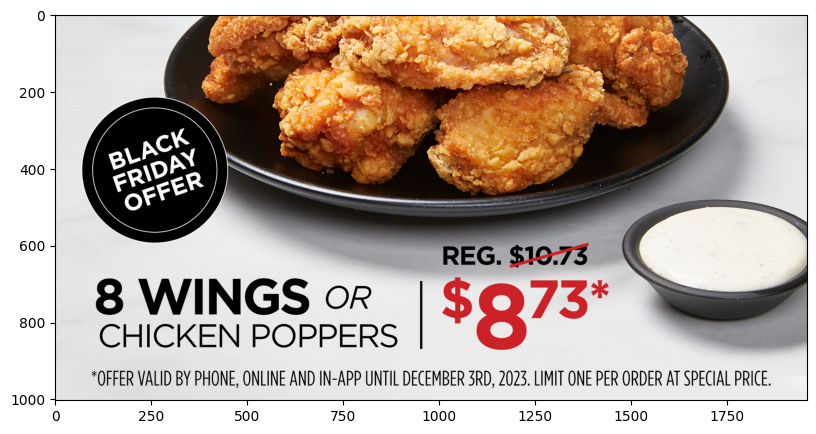

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

imageUrl = "./restaurant_images/fried_chicken.png"
image = Image.open(imageUrl).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

## Using Multi-Modal Pydantic Program to generate structured data from GPT4V Output for Restaurant Image 

In [ ]:
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""
openai_program = MultiModalLLMCompletionProgram.from_defaults(
    output_parser=PydanticOutputParser(Restaurant),
    image_documents=image_documents,
    prompt_template_str=prompt_template_str,
    multi_modal_llm=openai_mm_llm,
    verbose=True,
)

In [ ]:
response = openai_program()
for res in response:
    print(res)

('restaurant', 'Not Specified')
('food', '8 Wings or Chicken Poppers')
('discount', 'Black Friday Offer')
('price', '$8.73')
('rating', 'Not Specified')
('review', 'Not Specified')


## Test Pydantic for MiniGPT-4, Fuyu-8B, LLaVa-13B, CogVLM models

In [ ]:
from llama_index.multi_modal_llms.replicate import ReplicateMultiModal
from llama_index.multi_modal_llms.replicate.base import (
    REPLICATE_MULTI_MODAL_LLM_MODELS,
)

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""


def pydantic_replicate(
    model_name, output_class, image_documents, prompt_template_str
):
    mm_llm = ReplicateMultiModal(
        model=REPLICATE_MULTI_MODAL_LLM_MODELS[model_name],
        temperature=0.1,
        max_new_tokens=1000,
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=mm_llm,
        verbose=True,
    )

    response = llm_program()
    print(f"Model: {model_name}")
    for res in response:
        print(res)

### Using Fuyu-8B for Pydantic Strucured Output

In [ ]:
pydantic_replicate("fuyu-8b", Restaurant, image_documents, prompt_template_str)

### Using LLaVa-13B for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "llava-13b", Restaurant, image_documents, prompt_template_str
)

### Using MiniGPT-4 for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "minigpt-4", Restaurant, image_documents, prompt_template_str
)

### Using CogVLM for Pydantic Strucured Output

In [ ]:
pydantic_replicate("cogvlm", Restaurant, image_documents, prompt_template_str)

`Observation`:
* Only GPT4-V works pretty well for this image pydantic task
* Other vision model can output part fields

## Change to Amazon Product Example
### Download the Amazon Product Image Screenshot

In [ ]:
input_image_path = Path("amazon_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1p1Y1qAoM68eC4sAvvHaiJyPhdUZS0Gqb" -O ./amazon_images/amazon.png

## Initialize the Amazon Product Pydantic Class

In [ ]:
from pydantic import BaseModel


class Product(BaseModel):
    """Data model for a Amazon Product."""

    title: str
    category: str
    discount: str
    price: str
    rating: str
    review: str
    description: str
    inventory: str

### Plot the Image

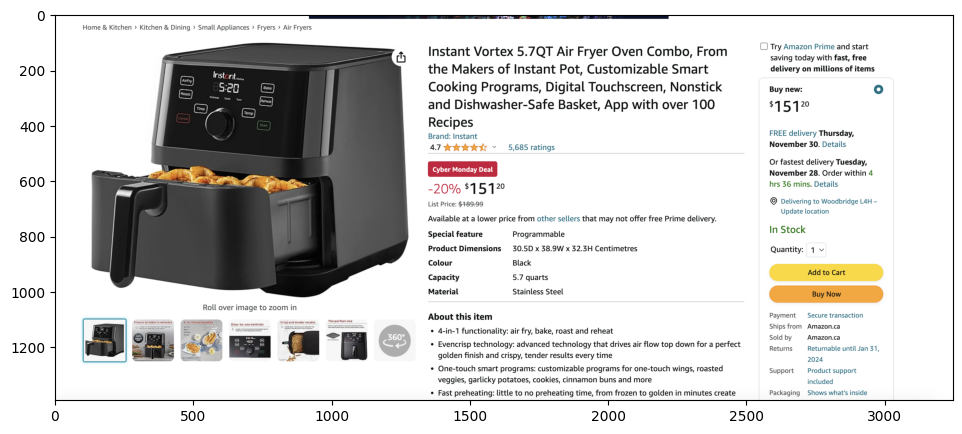

In [ ]:
imageUrl = "./amazon_images/amazon.png"
image = Image.open(imageUrl).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

## Using Multi-Modal Pydantic Program to generate structured data from GPT4V Output for Amazon Product Image

In [ ]:
amazon_image_documents = SimpleDirectoryReader("./amazon_images").load_data()

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""
openai_program_amazon = MultiModalLLMCompletionProgram.from_defaults(
    output_parser=PydanticOutputParser(Product),
    image_documents=amazon_image_documents,
    prompt_template_str=prompt_template_str,
    multi_modal_llm=openai_mm_llm,
    verbose=True,
)

In [ ]:
response = openai_program_amazon()
for res in response:
    print(res)

('title', 'Instant Vortex 5.7QT Air Fryer Oven Combo')
('category', 'Kitchen Appliances')
('discount', '20% off')
('price', '$151.20')
('rating', '4.7 out of 5 stars')
('review', '5086 ratings')
('description', '6-in-1 functionality; air fry, broil, bake, roast, reheat, and dehydrate. EvenCrisp Technology for crispy results. Easy to use touchscreen. Dishwasher safe parts. Cooks food faster and with less oil.')
('inventory', 'In stock')


## Test Pydantic for MiniGPT-4, Fuyu-8B, LLaVa-13B, CogVLM models

### Using Fuyu-8B for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "fuyu-8b", Product, amazon_image_documents, prompt_template_str
)

### Using MiniGPT-4 for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "minigpt-4", Product, amazon_image_documents, prompt_template_str
)

### Using CogVLM-4 for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "cogvlm", Product, amazon_image_documents, prompt_template_str
)

Model: cogvlm
('title', 'Instant Vortex 5.7QT Air Fryer Oven Combo')
('category', 'Kitchen Appliances')
('discount', '20% off')
('price', '151.00')
('rating', '4.5 stars')
('review', "Amazon's Choice")
('description', 'Instant Vortex 5.7QT Air Fryer Oven Combo, From the Makers of Instant Pot, Customizable Smart Cooking Programs, Digital Touchscreen, Nonstick and Dishwasher Safe Basket, App with over 100 Recipes')
('inventory', 'In stock')


### Using LlaVa-13B for Pydantic Strucured Output

In [ ]:
pydantic_replicate(
    "llava-13b", Product, amazon_image_documents, prompt_template_str
)

Model: llava-13b
('title', 'Instant Vortex 6.5 Qt Air Fryer Oven Combo')
('category', 'Kitchen Appliances')
('discount', '20% off')
('price', '$149.99')
('rating', '4.5 out of 5 stars')
('review', '500+ reviews')
('description', 'The Instant Vortex 6.5 Qt Air Fryer Oven Combo is a versatile and customizable small kitchen appliance that can air fry, bake, roast, broil, and dehydrate. It features a digital touchscreen, non-stick safe basket, and dishwasher safe basket, making it easy to use and clean. With over 1200 recipes, cooking programs, and digital touchscreen, this appliance is perfect for anyone looking to simplify their cooking routine.')
('inventory', 'In Stock')


`Observation`:
* Only GPT4v, Llava-13B and GogVLM output desired fields
* Among those 3 models, GPT4V get the most accurate results. Llava-13B and CogVLM got wrong price.

## Initialize the Instagram Ads Pydantic Class and compare performance of different Multi-Modal LLMs

In [ ]:
input_image_path = Path("instagram_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=12ZpBBFkYu-jzz1iz356U5kMikn4uN9ww" -O ./instagram_images/jordan.png

In [ ]:
from pydantic import BaseModel


class InsAds(BaseModel):
    """Data model for a Ins Ads."""

    account: str
    brand: str
    product: str
    category: str
    discount: str
    price: str
    comments: str
    review: str
    description: str

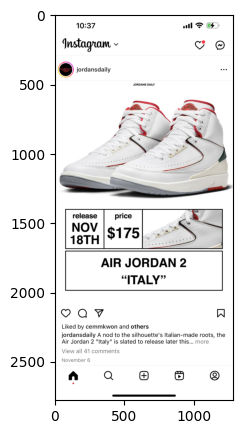

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

imageUrl = "./instagram_images/jordan.png"
image = Image.open(imageUrl).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

In [ ]:
ins_image_documents = SimpleDirectoryReader("./instagram_images").load_data()

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""
openai_program_ins = MultiModalLLMCompletionProgram.from_defaults(
    output_parser=PydanticOutputParser(InsAds),
    image_documents=ins_image_documents,
    prompt_template_str=prompt_template_str,
    multi_modal_llm=openai_mm_llm,
    verbose=True,
)


response = openai_program_ins()
for res in response:
    print(res)

('account', 'jordansdaily')
('brand', 'Air Jordan')
('product', 'Air Jordan 2')
('category', 'Footwear')
('discount', 'None')
('price', '$175')
('comments', 'Liked by cemm2k and others')
('review', 'Not available')
('description', "Release date November 18th - Air Jordan 2 'Italy'")


In [ ]:
pydantic_replicate("fuyu-8b", InsAds, ins_image_documents, prompt_template_str)

In [ ]:
pydantic_replicate(
    "llava-13b", InsAds, ins_image_documents, prompt_template_str
)

In [ ]:
pydantic_replicate("cogvlm", InsAds, ins_image_documents, prompt_template_str)

Model: cogvlm
('account', 'jordansdaily')
('brand', 'AIR JORDAN')
('product', '2')
('category', 'ITALY')
('discount', '')
('price', '$175')
('comments', '')
('review', '')
('description', "AIR JORDAN 2 'ITALY' release NOV 18TH $175")


In [ ]:
pydantic_replicate(
    "minigpt-4", InsAds, ins_image_documents, prompt_template_str
)

`Observation`:
* Only GPT4v and GogVLM output desired fields
* Among those 2 models, GPT4V gets more accurate results.